In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_dense_adj
from torch_geometric.transforms import NormalizeFeatures
from nn import GCN

In [3]:
# create the adjaceny matrix from the edge index
def create_adj(edge_index, num_nodes):
    # edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    adj = np.zeros((num_nodes, num_nodes), dtype=int)
    for i, j in edge_index:
        adj[i-1, j-1] = 1
        adj[j-1, i-1] = 1
    
    adj = torch.tensor(adj, dtype=torch.float) + torch.eye(num_nodes)
    return adj

data = np.loadtxt("ucidata-zachary/out.ucidata-zachary", dtype=int, skiprows=2)

num_nodes = 34
features_dim = 2
adj = create_adj(data, num_nodes)

# initialize random features
# features = torch.randn(num_nodes, 2)

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
labels = [0 if i in labels else 1 for i in range(num_nodes)]
labels = torch.tensor(labels, dtype=torch.long)

In [4]:
# model and optimizer
model = GCN(nin=features_dim, nout=16, nhid=16, nclass=2, num_nodes=num_nodes)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
# train the model
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = model(adj)           # n x 2
    loss = F.cross_entropy(output, labels)  # for each node, cross entropy loss compares the probability of the labels to the true label
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch}, Loss: {loss.item()}")



Epoch: 0, Loss: 0.6834746599197388
Epoch: 1, Loss: 0.6668153405189514
Epoch: 2, Loss: 0.6533612012863159
Epoch: 3, Loss: 0.6378865242004395
Epoch: 4, Loss: 0.6190047264099121
Epoch: 5, Loss: 0.597266435623169
Epoch: 6, Loss: 0.5735989809036255
Epoch: 7, Loss: 0.5486382246017456
Epoch: 8, Loss: 0.5225882530212402
Epoch: 9, Loss: 0.49534741044044495
Epoch: 10, Loss: 0.4671245217323303
Epoch: 11, Loss: 0.43878820538520813
Epoch: 12, Loss: 0.4115051031112671
Epoch: 13, Loss: 0.38601696491241455
Epoch: 14, Loss: 0.36224856972694397
Epoch: 15, Loss: 0.3398014307022095
Epoch: 16, Loss: 0.31859612464904785
Epoch: 17, Loss: 0.2988172173500061
Epoch: 18, Loss: 0.2804844379425049
Epoch: 19, Loss: 0.26330462098121643
Epoch: 20, Loss: 0.2469957321882248
Epoch: 21, Loss: 0.23157590627670288
Epoch: 22, Loss: 0.21728640794754028
Epoch: 23, Loss: 0.20436526834964752
Epoch: 24, Loss: 0.19287097454071045
Epoch: 25, Loss: 0.18262745440006256
Epoch: 26, Loss: 0.1733304262161255
Epoch: 27, Loss: 0.164704784

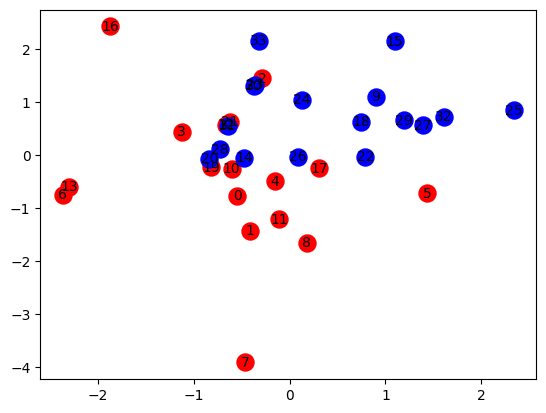

Parameter containing:
tensor([[-0.5467, -0.7700],
        [-0.4152, -1.4290],
        [-0.2867,  1.4442],
        [-1.1270,  0.4319],
        [-0.1579, -0.5020],
        [ 1.4374, -0.7273],
        [-2.3688, -0.7580],
        [-0.4684, -3.9178],
        [ 0.1797, -1.6603],
        [ 0.9018,  1.0982],
        [-0.6072, -0.2618],
        [-0.1099, -1.2168],
        [-0.6645,  0.5698],
        [-2.3060, -0.6084],
        [-0.4720, -0.0541],
        [ 1.0949,  2.1405],
        [-1.8722,  2.4194],
        [ 0.3088, -0.2545],
        [ 0.7467,  0.6232],
        [-0.8220, -0.2364],
        [-0.8394, -0.0717],
        [-0.6211,  0.6224],
        [ 0.7898, -0.0347],
        [-0.3640,  1.3158],
        [ 0.1311,  1.0405],
        [ 2.3386,  0.8361],
        [ 0.0856, -0.0404],
        [ 1.3868,  0.5537],
        [-0.7302,  0.1001],
        [ 1.1894,  0.6497],
        [-0.3748,  1.2969],
        [-0.6435,  0.5446],
        [ 1.6096,  0.7111],
        [-0.3222,  2.1487]], requires_grad=True)


In [7]:
# plot the outputs on a 2D plane
plt.scatter(model.features()[:, 0].detach().numpy(), model.features()[:, 1].detach().numpy())

# if the ith node is labeled 0, color it red, else blue
for i in range(num_nodes):
    if labels[i] == 0:
        plt.scatter(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), color='red', s=150)
    else:
        plt.scatter(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), color='blue', s=150)

# label the nodes, centered
for i in range(num_nodes):
    plt.text(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), str(i), ha='center', va='center')

plt.show()